In [12]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature

import cftime

In [5]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [142]:
#To compute de climatoloy

yearC1='2022'
yearC2='2023'

In [141]:
Titulos = ['Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria', 
           'Demarcación sudatlántica','Demarcación Estrecho y Alborán']
Titulos_short = ['LEB', 'NOR','CAN','SUD','ESA']

In [14]:
analisisDir='/Users/pvb/Dropbox/Oceanografia/Analisis/IEOOSWebPage'

In [139]:
i=2
titulo = Titulos[i]
titulo_short = Titulos_short[i]
FileIn =  analisisDir+'/data/sstLD_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstd_anom_'+titulo_short+'.png'

In [110]:
# Load the data from the .txt file
longDem, latiDem = [], []
with open('./LimiteDemarcaciones/Demarcacion'+titulo_short+'.txt', 'r') as f:
    for line in f:
        # Split the line by whitespace and append the values
        longitude, latitude = map(float, line.split())
        longDem.append(longitude)
        latiDem.append(latitude)

## Read the data

In [145]:
dataDir1='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_my_0.083_P1M-m_202311'
dataDir2='/Users/pvb/Dropbox/Oceanografia/Data/Climatologias/Glorys/cmems_mod_glo_phy_myint_0.083deg_P1M-m_202311/'

In [144]:
files = []

for iy in range(2020,2021):
    for im in range(1,13):
        files.append(dataDir1+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

for iy in range(2022,2024):
    for im in range(1,13):
        files.append(dataDir2+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

In [103]:
DC = xr.open_mfdataset(files)

In [104]:
DC

<xarray.Dataset> Size: 350GB
Dimensions:    (time: 24, latitude: 2041, longitude: 4320, depth: 50)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 192B 2022-01-16T12:00:00 ... 2023-12-16T...
Data variables:
    bottomT    (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    mlotst     (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    zos        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    sithick    (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    siconc     (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    usi        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    vsi        (time, latitude, longitude) float64 2GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float64 85GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [20]:
DC = data.drop_vars("mlotst").drop_vars("zos")
DC = DC.drop_vars("sithick").drop_vars("siconc")
DC = DC.drop_vars("usi").drop_vars("vsi").drop_vars("uo").drop_vars("vo").drop_vars("bottomT")

In [37]:
DC.longitude

<xarray.DataArray 'longitude' (longitude: 4320)> Size: 17kB
array([-180.     , -179.91667, -179.83333, ...,  179.75   ,  179.83333,
        179.91667], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
Attributes:
    valid_min:      -180.0
    valid_max:      179.91667
    step:           0.08332825
    units:          degrees_east
    unit_long:      Degrees East
    long_name:      Longitude
    standard_name:  longitude
    axis:           X

In [106]:
if titulo_short == 'LEB':
        slicelatitude=slice(35.5,42.5)
        slicelongitude=slice(360,368)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        print('>>>>> '+titulo)        
elif  titulo_short == 'NOR':
        slicelatitude=slice(41.5,46.9)
        slicelongitude=slice(346-360,-1.5)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        print('>>>>> '+titulo)        
elif  titulo_short == 'CAN':
        slicelatitude=slice(24.3,32.5)
        slicelongitude=slice(336-360,350-360)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        print('>>>>> '+titulo)
elif  titulo_short == 'SUD':
        slicelatitude=slice(35.5,37.5)
        slicelongitude=slice(352,354)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        print('>>>>> '+titulo)
elif  titulo_short == 'ESA':
        slicelatitude=slice(35.5,37)
        slicelongitude=slice(354,359)
        DC_temp=DC.thetao.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
        DC_salt=DC.so.sel(latitude=slicelatitude).sel(longitude=slicelongitude)
print('>>>>> '+titulo)

>>>>> Demarcación marina canaria
>>>>> Demarcación marina canaria


In [107]:
meanTemp=DC_temp.mean('time').sel(depth=10, method='nearest')

In [115]:
niveles=np.arange(18,25,0.1)

In [116]:
DC_temp.longitude

<xarray.DataArray 'longitude' (longitude: 169)> Size: 676B
array([-24.      , -23.916666, -23.833334, -23.75    , -23.666666, -23.583334,
       -23.5     , -23.416666, -23.333334, -23.25    , -23.166666, -23.083334,
       -23.      , -22.916666, -22.833334, -22.75    , -22.666666, -22.583334,
       -22.5     , -22.416666, -22.333334, -22.25    , -22.166666, -22.083334,
       -22.      , -21.916666, -21.833334, -21.75    , -21.666666, -21.583334,
       -21.5     , -21.416666, -21.333334, -21.25    , -21.166666, -21.083334,
       -21.      , -20.916666, -20.833334, -20.75    , -20.666666, -20.583334,
       -20.5     , -20.416666, -20.333334, -20.25    , -20.166666, -20.083334,
       -20.      , -19.916666, -19.833334, -19.75    , -19.666666, -19.583334,
       -19.5     , -19.416666, -19.333334, -19.25    , -19.166666, -19.083334,
       -19.      , -18.916666, -18.833334, -18.75    , -18.666666, -18.583334,
       -18.5     , -18.416666, -18.333334, -18.25    , -18.166666, -18.083334,
       -18.      , -17.916666, -17.833334, -17.75    , -17.666666, -17.583334,
       -17.5     , -17.416666, -17.333334, -17.25    , -17.166666, -17.083334,
       -17.      , -16.916666, -16.833334, -16.75    , -16.666666, -16.583334,
       -16.5     , -16.416666, -16.333334, -16.25    , -16.166666, -16.083334,
       -16.      , -15.916667, -15.833333, -15.75    , -15.666667, -15.583333,
       -15.5     , -15.416667, -15.333333, -15.25    , -15.166667, -15.083333,
       -15.      , -14.916667, -14.833333, -14.75    , -14.666667, -14.583333,
       -14.5     , -14.416667, -14.333333, -14.25    , -14.166667, -14.083333,
       -14.      , -13.916667, -13.833333, -13.75    , -13.666667, -13.583333,
       -13.5     , -13.416667, -13.333333, -13.25    , -13.166667, -13.083333,
       -13.      , -12.916667, -12.833333, -12.75    , -12.666667, -12.583333,
       -12.5     , -12.416667, -12.333333, -12.25    , -12.166667, -12.083333,
       -12.      , -11.916667, -11.833333, -11.75    , -11.666667, -11.583333,
       -11.5     , -11.416667, -11.333333, -11.25    , -11.166667, -11.083333,
       -11.      , -10.916667, -10.833333, -10.75    , -10.666667, -10.583333,
       -10.5     , -10.416667, -10.333333, -10.25    , -10.166667, -10.083333,
       -10.      ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 676B -24.0 -23.92 -23.83 ... -10.08 -10.0
Attributes:
    valid_min:      -180.0
    valid_max:      179.91667
    step:           0.08332825
    units:          degrees_east
    unit_long:      Degrees East
    long_name:      Longitude
    standard_name:  longitude
    axis:           X

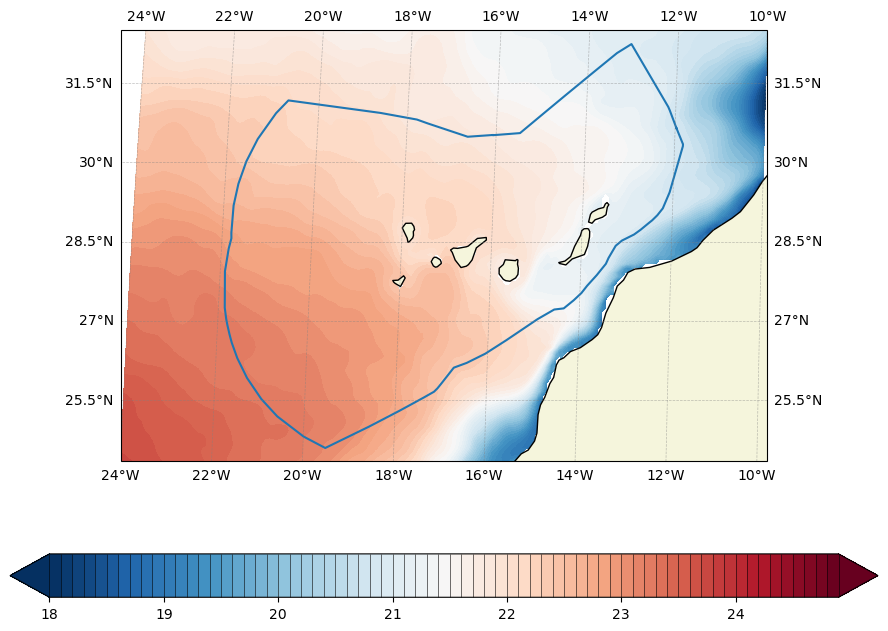

In [117]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

cm = ax.contourf(meanTemp.longitude,meanTemp.latitude,meanTemp, levels=niveles, 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = niveles[0],vmax = niveles[-1],extend='both')

land = cartopy.feature.NaturalEarthFeature('physical', 'land', edgecolor='k', scale = '50m' ,
        facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=np.arange(niveles[0],niveles[-1],1), 
                  drawedges=True)

ax.plot(longDem, latiDem, transform=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=.5,color='gray', alpha=0.5, linestyle='--')
#ax.set_title(Title + ', ' + sst.time.dt.strftime("%d %B %Y").values + '\n');
#    plt.savefig(FileOut)


In [118]:
prof_mean_temp = DC_temp.stack(flat_dim=('longitude', 'latitude','time')).mean('flat_dim')
prof_std_temp  = DC_temp.stack(flat_dim=('longitude', 'latitude','time')).std('flat_dim')

prof_mean_salt = DC_salt.stack(flat_dim=('longitude', 'latitude','time')).mean('flat_dim')
prof_std_salt  = DC_salt.stack(flat_dim=('longitude', 'latitude','time')).std('flat_dim')

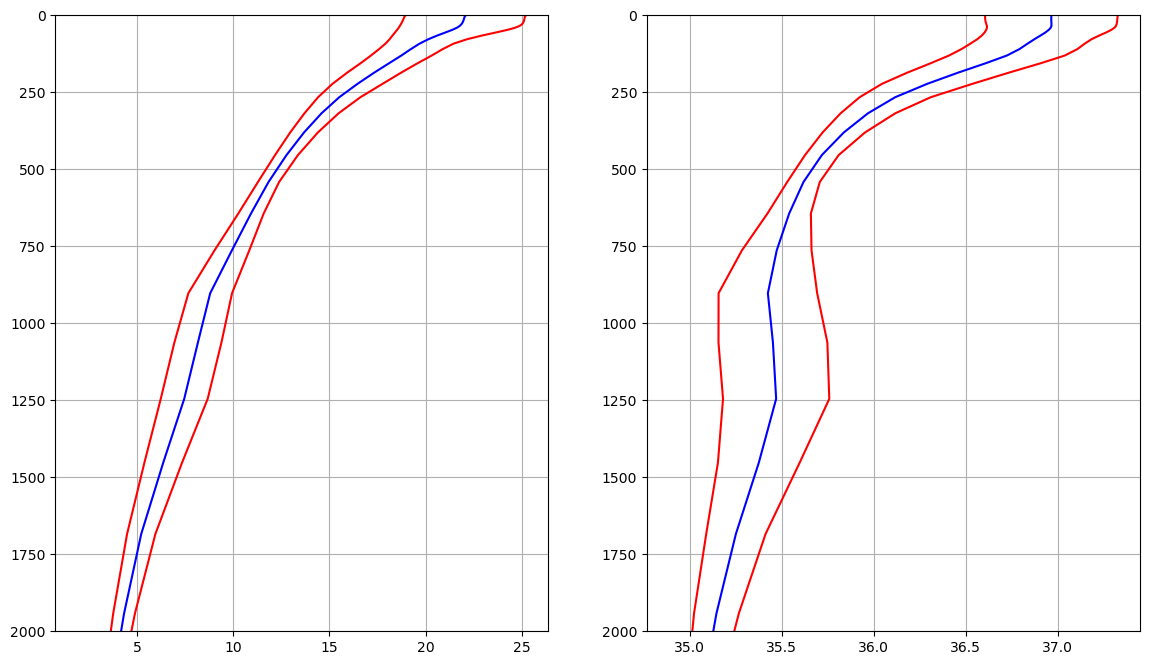

In [119]:
fig,ax= plt.subplots(1,2,figsize=(14,8))

#ax[0].plot(DC_temp.stack(flat_dim=('longitude', 'latitude','time')),DC_temp.depth, color='lightgrey')
ax[0].plot(prof_mean_temp,prof_mean_temp.depth,color='blue')  
ax[0].plot(prof_mean_temp+1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].plot(prof_mean_temp-1.5*prof_std_temp,prof_mean_temp.depth,color='red')  
ax[0].invert_yaxis()
ax[0].set_ylim([2000,0]);
ax[0].grid()

#ax[1].plot(DC_salt.stack(flat_dim=('lon', 'lat','time')),DC_temp.depth, color='lightgrey')
ax[1].plot(prof_mean_salt,prof_mean_temp.depth,color='blue')  
ax[1].plot(prof_mean_salt+1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].plot(prof_mean_salt-1.5*prof_std_salt,prof_mean_salt.depth,color='red')  
ax[1].invert_yaxis()
ax[1].set_ylim([2000,0]);
ax[1].grid()

## Seasonal cycle

In [122]:
#Create monthly climatology

DC_temp_clim = DC_temp.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();
DC_salt_clim = DC_salt.sel(time=slice(yearC1,yearC2)).groupby('time.month').mean(dim='time').load();

#Create anomaly
DC_temp_anom = DC_temp.groupby('time.month') - DC_temp_clim
DC_temp_anom.load();

DC_salt_anom = DC_salt.groupby('time.month') - DC_salt_clim
DC_salt_anom.load();

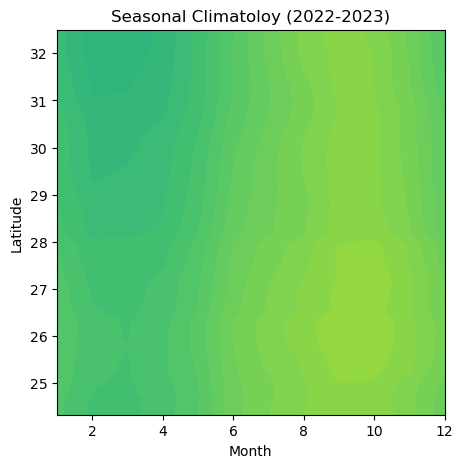

In [125]:
fig, ax = plt.subplots(1, 1 , figsize=(5,5))
ax.contourf(DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').month,
                 DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').latitude,
                 DC_temp_clim.mean(dim='longitude').sel(depth=10, method='nearest').transpose(),
            levels=12, vmin=-2, vmax=30)
ax.grid()
ax.set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax.set_ylabel('Latitude') 
ax.set_xlabel('Month')
ax.grid()

# Weighted mean

In [129]:
weights = np.cos(np.deg2rad(DC.thetao.latitude))
weights = weights/weights.max()
weights.name = "weights"
DC_temp_weighted = DC_temp.weighted(weights)
DC_salt_weighted = DC_salt.weighted(weights)
DC_temp_anom_weighted = DC_temp_anom.weighted(weights)
DC_salt_anom_weighted = DC_salt_anom.weighted(weights)

In [130]:
DC_temp_wmean = DC_temp_weighted.mean(("longitude", "latitude"),skipna=True).load()
DC_salt_wmean = DC_salt_weighted.mean(("longitude", "latitude"),skipna=True).load()

DC_temp_anom_wmean = DC_temp_anom_weighted.mean(("longitude", "latitude"),skipna=True).load()
DC_salt_anom_wmean = DC_salt_anom_weighted.mean(("longitude", "latitude"),skipna=True).load()

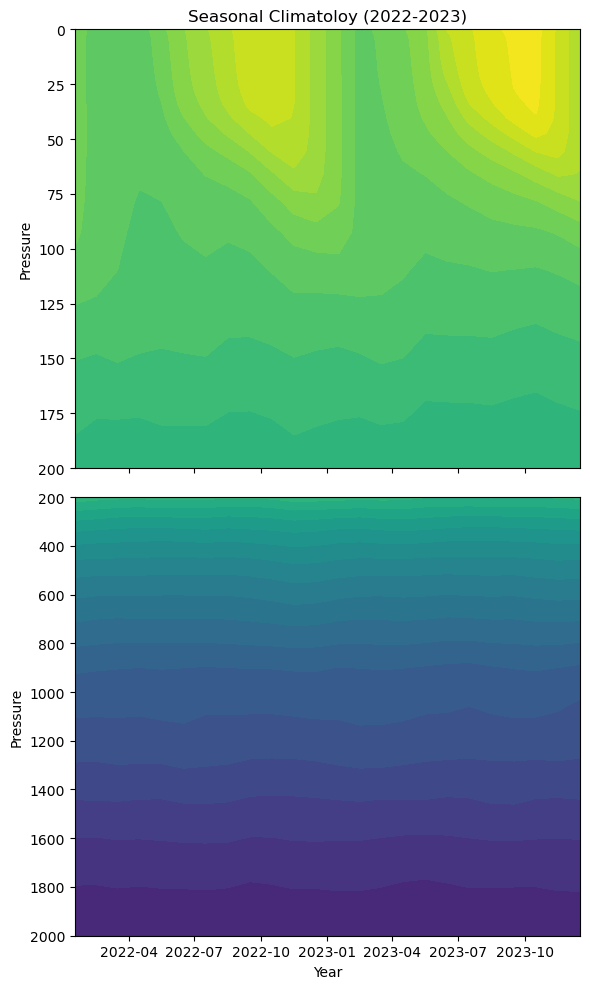

In [131]:
fig, ax = plt.subplots(2, 1 , sharex=True, figsize=(6,10))
ax[0].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[0].set_title('Seasonal Climatoloy (' + yearC1 + '-' + yearC2 + ')')
ax[0].set_ylabel('Pressure') 
ax[0].invert_yaxis()
ax[0].set_ylim([200,0]);

ax[1].contourf(DC_temp_wmean.time, DC_temp_wmean.depth, 
            DC_temp_wmean.transpose(), 32)
ax[1].set_ylabel('Pressure') 
ax[1].set_xlabel('Year')
ax[1].invert_yaxis()
ax[1].set_ylim([2000,200]);

fig.tight_layout()

## Smoothed versions

In [133]:
DC_temp_wmean_rolling = DC_temp_wmean.rolling(time=12,center=True).mean()
DC_salt_wmean_rolling = DC_salt_wmean.rolling(time=12,center=True).mean()

DC_temp_anom_wmean_rolling = DC_temp_anom_wmean.rolling(time=12,center=True).mean()
DC_salt_anom_wmean_rolling = DC_salt_anom_wmean.rolling(time=12,center=True).mean()

In [134]:
Posiciones=[(0.10, 0.65, 0.8, 0.22),
            (0.10, 0.48, 0.8, 0.165),
            (0.10, 0.10, 0.8, 0.378)]

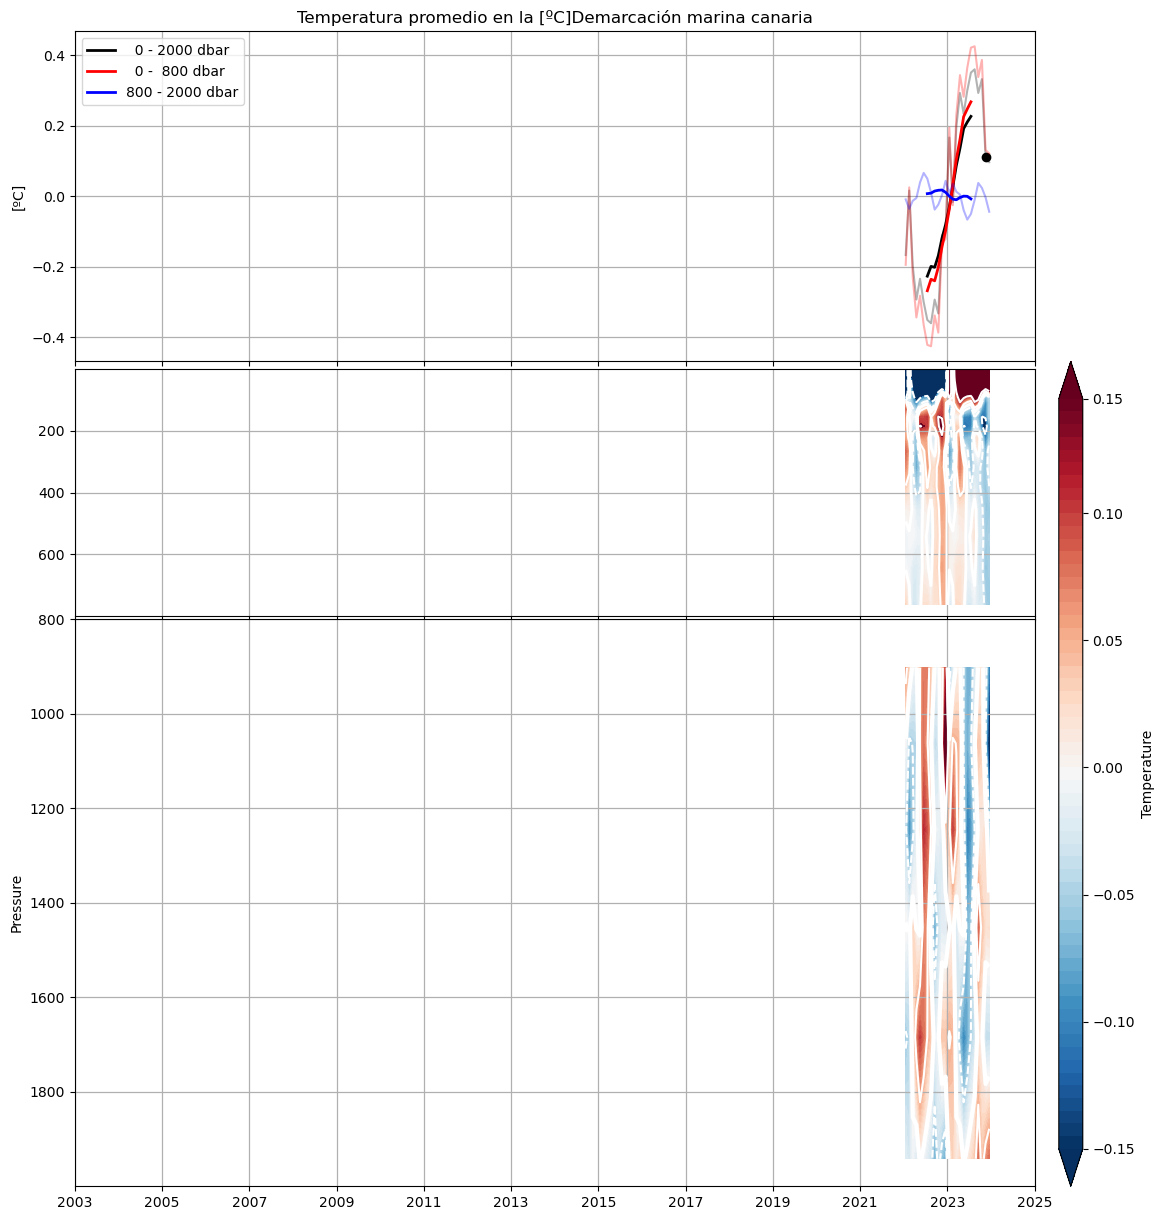

In [138]:
fig, ax = plt.subplots(3,1,figsize = (12,15),sharex=True)


# Mean values
ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth"),color='k',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean.time[-2],
           DC_temp_anom_wmean.sel(depth=slice(0,2000)).mean("depth")[-2],'ko')
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,2000)).mean("depth"),linewidth=2,color='k',  label= '  0 - 2000 dbar')


ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(0,800)).mean("depth"),color='r',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(0,800)).mean("depth"),linewidth=2,color='r' ,  label= '  0 -  800 dbar')

ax[0].plot(DC_temp_anom_wmean.time,
           DC_temp_anom_wmean.sel(depth=slice(800,2000)).mean("depth"),color='b',alpha=0.3)
ax[0].plot(DC_temp_anom_wmean_rolling.time,
           DC_temp_anom_wmean_rolling.sel(depth=slice(800,2000)).mean("depth"),linewidth=2,color='b',label= '800 - 2000 dbar')
ax[0].grid(linestyle='-', linewidth=.9)
ax[0].set_position(Posiciones[0])
ax[0].legend()
ax[0].set_ylabel('[ºC]')
ax[0].set_title('Temperatura promedio en la [ºC]'+titulo)

# UpperOcean
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose()
              ,colors='w',levels=[-0.15, -0.05, 0.05, 0.15] )
ax[1].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),colors='w', linewidths=2,
              levels=[0] )

ax[1].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(0,800)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(0,800)).transpose(),
              cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both',vmin=-0.2, vmax=0.2)
ax[1].set_ylim(0,800)
ax[1].invert_yaxis()
ax[1].set_yticks([200,400,600])
ax[1].grid(linestyle='-', linewidth=.9)
ax[1].set_position(Posiciones[1])

ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w',
              levels=[-0.05,0.05] )
ax[2].contour(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
              DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),colors='w', linewidths=3,
              levels=[0] )
cntr2 = ax[2].contourf(DC_temp_anom_wmean.time, DC_temp_anom_wmean.sel(depth=slice(800,2000)).depth, 
                      DC_temp_anom_wmean.sel(depth=slice(800,2000)).transpose(),
                      cmap='RdBu_r',levels=np.arange(-0.15,0.15,0.005),extend='both')
ax[2].set_ylim(800,2000)
ax[2].invert_yaxis()
ax[2].set_yticks([800,1000,1200,1400,1600,1800])
ax[2].grid(linestyle='-', linewidth=.9)
ax[2].set_position(Posiciones[2])
ax[2].set_ylabel('Pressure')

# Adding the colorbar
cbaxes = fig.add_axes([0.92, 0.1, 0.02, 0.55])  
cb = fig.colorbar(cntr2, cax=cbaxes);
cbaxes.set_yticks([-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15])
cbaxes.set_ylabel('Temperature')

# xtick Labels
ax[0].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[1].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));
ax[2].set_xticks(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN'));

ax[2].set_xticklabels(pd.date_range(start="2003-01-01", end="2025-01-01",freq='2YS-JAN').strftime('%Y'));